<a href="https://colab.research.google.com/github/sudarshan-koirala/youtube-stuffs/blob/main/llamaindex/LlamaIndex_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LlamaIndex
## [Youtube Video covering this notebook](https://youtu.be/QNKeNiRjtGQ?si=UFH9WL5nXvmj2EM1)
- [LlamaIndex Website](https://www.llamaindex.ai/)
- [LangChain Website](https://python.langchain.com/docs/get_started/introduction)
-[Retrieval-Augmented Generation (RAG)](https://research.ibm.com/blog/retrieval-augmented-generation-RAG)


## Install libraries and Env Setup

In [ ]:
%%capture
!pip install llama-index openai

In [ ]:
import os
# https://platform.openai.com/account/api-keys
os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY"

## Implementation

In [ ]:
# Import necessary packages
from llama_index.llms import OpenAI
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from IPython.display import Markdown, display

In [ ]:
#VectorStoreIndex??
#SimpleDirectoryReader??

In [ ]:
import os
import subprocess

# Specify the URL of the PDF file you want to download
pdf_url = "https://browse.arxiv.org/pdf/1706.03762.pdf"

# Specify the directory where you want to save the PDF file
download_dir = "data"

# Specify the desired new name for the downloaded PDF file
new_filename = "attention-is-all-you-need.pdf"

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Use wget to download the PDF file into the directory
command = f"wget -P {download_dir} {pdf_url}"

# Execute the wget command using subprocess
try:
    subprocess.run(command, shell=True, check=True)
    print(f"PDF downloaded successfully to {download_dir}")

    # Rename the downloaded file to the desired name
    old_filepath = os.path.join(download_dir, os.path.basename(pdf_url))
    new_filepath = os.path.join(download_dir, new_filename)
    os.rename(old_filepath, new_filepath)
    print(f"PDF renamed to {new_filename}")
except subprocess.CalledProcessError as e:
    print(f"Error: {e}")

PDF downloaded successfully to data
PDF renamed to attention-is-all-you-need.pdf


In [ ]:
%%capture
!pip install pypdf

## Load documents and build index

In [ ]:
#document loader
documents = SimpleDirectoryReader("data").load_data()

In [ ]:
len(documents)

15

In [ ]:
documents[0]

Document(id_='b4af931a-4c5e-4b2f-83ea-22c0b604e219', embedding=None, metadata={'page_label': '1', 'file_name': 'attention-is-all-you-need.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='097b058bac59d3db9e75f68f815021f9770ec4974c10dd03ced0a86cbb64e7c6', text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or

[LlamaIndex Vector Store Index](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/index/vector_store_guide.html)

In [ ]:
# build index/vectorstore (document splitting, embedding, storing embeddings + chunks)
index = VectorStoreIndex.from_documents(documents)

[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Query
Start querying by getting the default query engine

In [ ]:
query_engine = index.as_query_engine() #no history preserved

In [ ]:
response = query_engine.query("What is the paper about ?")

In [ ]:
response

Response(response='The paper is about attention in neural networks, specifically in the context of natural language processing.', source_nodes=[NodeWithScore(node=TextNode(id_='7bd819e8-0ac5-43eb-9e85-f55beb3763cf', embedding=None, metadata={'page_label': '15', 'file_name': 'attention-is-all-you-need.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='89bddfef-1c56-4fdc-a6c2-e00690dd244e', node_type=None, metadata={'page_label': '15', 'file_name': 'attention-is-all-you-need.pdf'}, hash='75127f36ad5f92a4af2616c04854ecd1216826b1942f707750fe4f06d8c3e7a1')}, hash='75127f36ad5f92a4af2616c04854ecd1216826b1942f707750fe4f06d8c3e7a1', text='Input-Input Layer5\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwhat\nwe\nare\nmissing\n,\nin\nmy\nopinion\n.\n<EOS>\n<pad>\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwh

In [ ]:
display(Markdown(f"<b>{response}</b>"))

<b>The paper is about attention in neural networks, specifically in the context of natural language processing.</b>

### Storing and Loading the Index

In [ ]:
index.storage_context.persist()

In [ ]:
from llama_index import StorageContext, load_index_from_storage

storage_context = StorageContext.from_defaults(persist_dir="./storage")
index = load_index_from_storage(storage_context=storage_context)

## We used the default one,  How to Customize It ??
[Customizing LLms within LlamaIndex](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html)

In [ ]:
from llama_index import ServiceContext, set_global_service_context
from llama_index.llms import OpenAI
# alternatively
# from langchain.llms import ...

In [ ]:
#define LLM
llm = OpenAI(temperature=0.1, model="gpt-3.5-turbo", max_tokens=512)

# configure service context
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=500, chunk_overlap=50)

# set_global_service_context(service_context)
index = VectorStoreIndex.from_documents(documents, service_context=service_context)

In [ ]:
query_engine = index.as_query_engine(streaming=True)
response = query_engine.query("What is the paper about ?")
response.print_response_stream()

The paper is about attention in neural networks, specifically in the context of natural language processing.

## Using LLM From HuggingFace [LINK](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html#example-using-a-huggingface-llm)

In [ ]:
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

import torch
from llama_index.llms import HuggingFaceLLM
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

ImportError: ignored

In [ ]:
%%capture
!pip install transformers[torch]

In [ ]:
import torch
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

KeyboardInterrupt: ignored

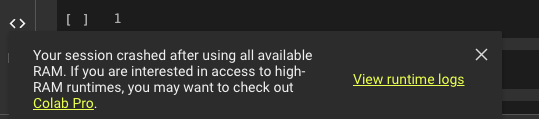

In [ ]:
# configure service context
service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    #embed_model="local"
)

In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)